# Urbaczewski's Putters<a id=1></a>

In this problem, Urbaczewski's Putters is the manufacturer of the finest milled golf putters available. There are three plants that manufacture the putters, two distribution centers, and five warehouses. We need to ship the putterss to the warehouses at a minimum cost satisfying the constraints outlined in the spreadsheet. Namely, each plant can only produce so much product, the number of putters passing through the distribution centers has to remain constant (in has to equal out), and each warehouse has a minimum amount that they need in order to satisfy demand.

## Solve the following problems.
1. What is the minimum cost to ship these putters from our plants to the warehouses while satisfying all of our constraints? Minimum cost: $30990.00

2. What are the final values of the decision variables? Shown in code below.

3. Is there any slack in the system? If so, what is the amount/route that shows slack? - Plant 3 with slack of 1250.
4. Suppose management tells us that the per unit shipping cost from Plant P3 to Distribution Center D1 is going to change to \$.62. How do your answers to 1. and 2. change? Optimal objective value minimum cost slightly decreased = $30897.50. The decision variables do not change.
5. Show the values of the decision variables as barcharts using `seaborn`. Create a separate plot for Plants to Distribution Centers (colored by DCs) and another for DCs to Warehouses (colored by WHs).
6. Create a sequence of shipping costs (P3 to D1) from 0.55 to 0.75 in one cent increments (21 unique values).

    a. Make a plot showing how the overall shipping costs change as a function of this sequence.
    
    b. Make two plots showing: (1) the number of putters shipped between Plant P3 and the two distribution centers and (2) the number of putters shipped between each distribution center and the five warehouses. The lines be shown using different colors.
    
7. Finally, let's investigate how changing the demand on the third warehouse changes the final value of the objective function. Create a sequence of demands from 5700 to 8200 by 100 units. Plots those demands on the x axis and the final minimum cost on the y. - When I ran the model in excel, the allowable increase for W3 was 1200. Therefore, the graph would not work with any values higher than 7200, since the original requirement was 6000.

##### [Back to Top](#Top)

### Import Modules<a id=2></a>

In [ ]:
!pip install pyomo
!apt-get install -y -qq glpk-utils
import pandas as pd
import pyomo.environ as pe
import matplotlib.pyplot as plt
import seaborn as sns

import os
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

### Read and convert data

In [ ]:
os.chdir("drive/My Drive")

df = pd.read_excel('quiz-1.xlsx')
df

,Data,Unnamed: 1,(To) Distribution Center,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,(From) Plant,D1,D2,Capacity,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,P1,0.5,0.6,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,P2,0.65,0.65,11000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,P3,0.63,0.78,10500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,(To) Warehouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,(From) DC,W1,W2,W3,W4,W5,NaN,NaN,NaN,NaN,NaN
7,NaN,D1,0.5,0.4,0.3,0.5,0.72,NaN,NaN,NaN,NaN,NaN
8,NaN,D2,0.7,0.6,0.2,0.5,0.55,NaN,NaN,NaN,NaN,NaN
9,NaN,Requirement,5000,7500,6000,5500,6250,NaN,NaN,NaN,NaN,NaN


#### Problem 1

In [ ]:
cost = pd.DataFrame(df.iloc[1:4, 2:4])
cost.index = ['P1', 'P2', 'P3']
cost.columns = ['D1','D2']
cost

,D1,D2
P1,0.5,0.6
P2,0.65,0.65
P3,0.63,0.78


In [ ]:
capacity = pd.DataFrame(df.iloc[1:4,4])
capacity.index = cost.index[0:]
capacity.columns = ['capacity']
capacity

,capacity
P1,10000
P2,11000
P3,10500


In [ ]:
requirement = pd.DataFrame(df.iloc[9,2:7])
requirement.index = ['W1','W2','W3','W4','W5']
requirement.columns = ['requirement']
requirement

,requirement
W1,5000
W2,7500
W3,6000
W4,5500
W5,6250


In [ ]:
DtoWcost = pd.DataFrame(df.iloc[7:9, 2:7])
DtoWcost.index = ['D1', 'D2']
DtoWcost.columns = ['W1','W2','W3','W4','W5']
DtoWcost

,W1,W2,W3,W4,W5
D1,0.5,0.4,0.3,0.5,0.72
D2,0.7,0.6,0.2,0.5,0.55


In [ ]:
model = pe.ConcreteModel()
P_indexes = ['D1','D2']
W_indexes = ['W1','W2','W3','W4','W5']
model.P1 = pe.Var(P_indexes, domain = pe.NonNegativeReals)
model.P2 = pe.Var(P_indexes, domain = pe.NonNegativeReals)
model.P3 = pe.Var(P_indexes, domain = pe.NonNegativeReals)
model.D1 = pe.Var(W_indexes, domain = pe.NonNegativeReals)
model.D2 = pe.Var(W_indexes, domain = pe.NonNegativeReals)
model.pprint()

5 Set Declarations
    D1_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {'W1', 'W2', 'W3', 'W4', 'W5'}
    D2_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {'W1', 'W2', 'W3', 'W4', 'W5'}
    P1_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'D1', 'D2'}
    P2_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'D1', 'D2'}
    P3_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'D1', 'D2'}

5 Var Declarations
    D1 : Size=5, Index=D1_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
         W1 :     0 :  None :  None : False :  True : NonNegativeReals
 

In [ ]:
model.obj = pe.Objective(expr = sum([DtoWcost.loc['D1', index]*model.D1[index] for index in W_indexes]+
      [DtoWcost.loc['D2', index]*model.D2[index] for index in W_indexes] +
      [cost.loc['P1', index]*model.P1[index] for index in cost]+
      [cost.loc['P2', index]*model.P2[index] for index in cost]+
      [cost.loc['P3', index]*model.P3[index] for index in cost]),
      sense = pe.minimize)
model.obj.pprint()

obj : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : 0.5*D1[W1] + 0.4*D1[W2] + 0.3*D1[W3] + 0.5*D1[W4] + 0.72*D1[W5] + 0.7*D2[W1] + 0.6*D2[W2] + 0.2*D2[W3] + 0.5*D2[W4] + 0.55*D2[W5] + 0.5*P1[D1] + 0.6*P1[D2] + 0.65*P2[D1] + 0.65*P2[D2] + 0.63*P3[D1] + 0.78*P3[D2]


In [ ]:
#Capacity Constraints
model.con_P1 = pe.Constraint(expr = sum(model.P1[index] for index in P_indexes)
                              <= capacity.loc['P1','capacity'])
model.con_P2 = pe.Constraint(expr = sum(model.P2[index] for index in P_indexes)
                              <= capacity.loc['P2','capacity'])
model.con_P3 = pe.Constraint(expr = sum(model.P3[index] for index in P_indexes)
                              <= capacity.loc['P3','capacity'])
#Demand Constraints
model.con_W1 = pe.Constraint(expr = model.D1['W1'] + model.D2['W1'] >= requirement.loc['W1','requirement'])
model.con_W2 = pe.Constraint(expr = model.D1['W2'] + model.D2['W2'] >= requirement.loc['W2','requirement'])
model.con_W3 = pe.Constraint(expr = model.D1['W3'] + model.D2['W3'] >= requirement.loc['W3','requirement'])
model.con_W4 = pe.Constraint(expr = model.D1['W4'] + model.D2['W4'] >= requirement.loc['W4','requirement'])
model.con_W5 = pe.Constraint(expr = model.D1['W5'] + model.D2['W5'] >= requirement.loc['W5','requirement'])

#Flow Constraints
model.con_D1Flow = pe.Constraint(expr = (model.P1['D1'] + model.P2['D1'] + model.P3['D1']) == (model.D1['W1'] + model.D1['W2'] + model.D1['W3'] + model.D1['W4'] + model.D1['W5']))
model.con_D2Flow = pe.Constraint(expr = (model.P1['D2'] + model.P2['D2'] + model.P3['D2']) == (model.D2['W1'] + model.D2['W2'] + model.D2['W3'] + model.D2['W4'] + model.D2['W5']))

In [ ]:
opt = pe.SolverFactory('glpk')
result = opt.solve(model)
print(result.solver.status, result.solver.termination_condition)


ok optimal


In [ ]:
model.display()

Model unknown

  Variables:
    P1 : Size=2, Index=P1_index
        Key : Lower : Value   : Upper : Fixed : Stale : Domain
         D1 :     0 : 10000.0 :  None : False : False : NonNegativeReals
         D2 :     0 :     0.0 :  None : False : False : NonNegativeReals
    P2 : Size=2, Index=P2_index
        Key : Lower : Value   : Upper : Fixed : Stale : Domain
         D1 :     0 :     0.0 :  None : False : False : NonNegativeReals
         D2 :     0 : 11000.0 :  None : False : False : NonNegativeReals
    P3 : Size=2, Index=P3_index
        Key : Lower : Value  : Upper : Fixed : Stale : Domain
         D1 :     0 : 9250.0 :  None : False : False : NonNegativeReals
         D2 :     0 :    0.0 :  None : False : False : NonNegativeReals
    D1 : Size=5, Index=D1_index
        Key : Lower : Value  : Upper : Fixed : Stale : Domain
         W1 :     0 : 5000.0 :  None : False : False : NonNegativeReals
         W2 :     0 : 7500.0 :  None : False : False : NonNegativeReals
         W3 : 

In [ ]:
obj_val = model.obj.expr()
print(f'optimal objective value minimum cost = ${obj_val:.2f}')

optimal objective value minimum cost = $30990.00


#### Problem 2

In [ ]:
for DV in model.component_objects(pe.Var):
    print(DV)
    for var in DV:
        print(" ", var, DV[var].value)

P1
  D1 10000.0
  D2 0.0
P2
  D1 0.0
  D2 11000.0
P3
  D1 9250.0
  D2 0.0
D1
  W1 5000.0
  W2 7500.0
  W3 1250.0
  W4 5500.0
  W5 0.0
D2
  W1 0.0
  W2 0.0
  W3 4750.0
  W4 0.0
  W5 6250.0


In [ ]:
DV_solution_P = pd.DataFrame()
for DV in model.component_objects(pe.Var):
  if DV.name[0]=='P':
    for var in DV:
      DV_solution_P.loc[DV.name, var] = DV[var].value
DV_solution_D = pd.DataFrame()
for DV in model.component_objects(pe.Var):
  if DV.name[0]=='D':
    for var in DV:
      DV_solution_D.loc[DV.name, var] = DV[var].value


#### Problem 3

In [ ]:
print(f'Plant 1 slack = {model.con_P1.slack()}')
print(f'Plant 2 slack = {model.con_P2.slack()}')
print(f'Plant 3 slack = {model.con_P3.slack()}')
print(f'Warehouse 1 slack = {model.con_W1.slack()}')
print(f'Warehouse 2 slack = {model.con_W2.slack()}')
print(f'Warehouse 3 slack = {model.con_W3.slack()}')
print(f'Warehouse 4 slack = {model.con_W4.slack()}')
print(f'Warehouse 5 slack = {model.con_W5.slack()}')
print(f'Distribution 1 Flow slack = {model.con_D1Flow.slack()}')
print(f'Distribution 2 slack = {model.con_D2Flow.slack()}')


Plant 1 slack = 0.0
Plant 2 slack = 0.0
Plant 3 slack = 1250.0
Warehouse 1 slack = 0.0
Warehouse 2 slack = 0.0
Warehouse 3 slack = 0.0
Warehouse 4 slack = 0.0
Warehouse 5 slack = 0.0
Distribution 1 Flow slack = 0.0
Distribution 2 slack = 0.0


#### Problem 4

In [ ]:
cost.loc['P3','D1'] = .62

model.obj = pe.Objective(expr = sum([DtoWcost.loc['D1', index]*model.D1[index] for index in W_indexes]+
      [DtoWcost.loc['D2', index]*model.D2[index] for index in W_indexes] +
      [cost.loc['P1', index]*model.P1[index] for index in cost]+
      [cost.loc['P2', index]*model.P2[index] for index in cost]+
      [cost.loc['P3', index]*model.P3[index] for index in cost]),
      sense = pe.minimize)
model.obj.pprint()

opt = pe.SolverFactory('glpk')
result = opt.solve(model)
print(result.solver.status, result.solver.termination_condition)

model.display()
obj_val = model.obj.expr()
print(f'optimal objective value minimum cost = ${obj_val:.2f}')

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


obj : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : 0.5*D1[W1] + 0.4*D1[W2] + 0.3*D1[W3] + 0.5*D1[W4] + 0.72*D1[W5] + 0.7*D2[W1] + 0.6*D2[W2] + 0.2*D2[W3] + 0.5*D2[W4] + 0.55*D2[W5] + 0.5*P1[D1] + 0.6*P1[D2] + 0.65*P2[D1] + 0.65*P2[D2] + 0.62*P3[D1] + 0.78*P3[D2]
ok optimal
Model unknown

  Variables:
    P1 : Size=2, Index=P1_index
        Key : Lower : Value   : Upper : Fixed : Stale : Domain
         D1 :     0 : 10000.0 :  None : False : False : NonNegativeReals
         D2 :     0 :     0.0 :  None : False : False : NonNegativeReals
    P2 : Size=2, Index=P2_index
        Key : Lower : Value   : Upper : Fixed : Stale : Domain
         D1 :     0 :     0.0 :  None : False : False : NonNegativeReals
         D2 :     0 : 11000.0 :  None : False : False : NonNegativeReals
    P3 : Size=2, Index=P3_index
        Key : Lower : Value  : Upper : Fixed : Stale : Domain
         D1 :     0 : 9250.0 :  None : False : False : NonNega

#### Problem 5

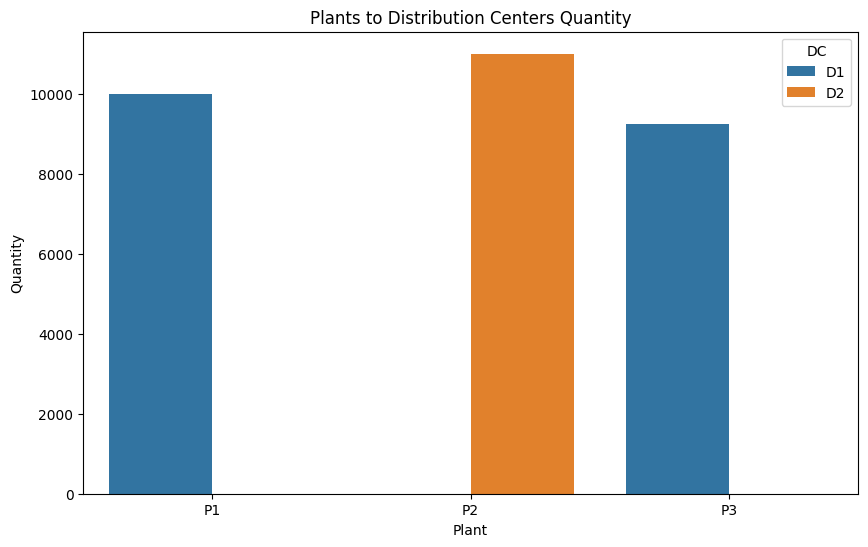

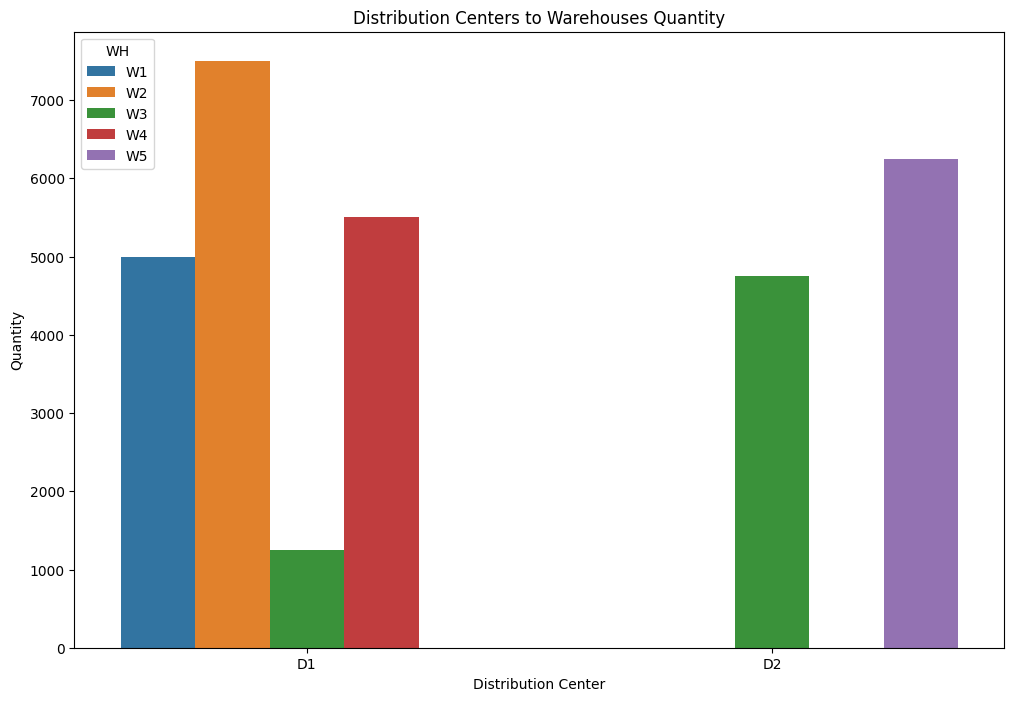

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melting the dataframes for seaborn plotting
DV_solution_P_melt = DV_solution_P.reset_index().melt(id_vars="index", var_name="DC", value_name="Quantity")
DV_solution_D_melt = DV_solution_D.reset_index().melt(id_vars="index", var_name="WH", value_name="Quantity")

# Plotting Plants to Distribution Centers
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Quantity', hue='DC', data=DV_solution_P_melt)
plt.title('Plants to Distribution Centers Quantity')
plt.xlabel('Plant')
plt.ylabel('Quantity')
plt.show()

# Plotting Distribution Centers to Warehouses
plt.figure(figsize=(12, 8))
sns.barplot(x='index', y='Quantity', hue='WH', data=DV_solution_D_melt)
plt.title('Distribution Centers to Warehouses Quantity')
plt.xlabel('Distribution Center')
plt.ylabel('Quantity')
plt.show()

#### Problem 6a

In [ ]:
def run_model():
    #Function to run the model

    #This just runs the model as we defined it above
    model = pe.ConcreteModel()
    #Decision Variables
    P_indexes = ['D1','D2']
    W_indexes = ['W1','W2','W3','W4','W5']
    model.P1 = pe.Var(P_indexes, domain = pe.NonNegativeReals)
    model.P2 = pe.Var(P_indexes, domain = pe.NonNegativeReals)
    model.P3 = pe.Var(P_indexes, domain = pe.NonNegativeReals)
    model.D1 = pe.Var(W_indexes, domain = pe.NonNegativeReals)
    model.D2 = pe.Var(W_indexes, domain = pe.NonNegativeReals)
    #Objective Function
    model.obj = pe.Objective(expr = sum([DtoWcost.loc['D1', index]*model.D1[index] for index in W_indexes]+
      [DtoWcost.loc['D2', index]*model.D2[index] for index in W_indexes] +
      [cost.loc['P1', index]*model.P1[index] for index in cost]+
      [cost.loc['P2', index]*model.P2[index] for index in cost]+
      [cost.loc['P3', index]*model.P3[index] for index in cost]),
      sense = pe.minimize)
    #Capacity Constraints
    model.con_P1 = pe.Constraint(expr = sum(model.P1[index] for index in P_indexes)
                              <= capacity.loc['P1','capacity'])
    model.con_P2 = pe.Constraint(expr = sum(model.P2[index] for index in P_indexes)
                              <= capacity.loc['P2','capacity'])
    model.con_P3 = pe.Constraint(expr = sum(model.P3[index] for index in P_indexes)
                              <= capacity.loc['P3','capacity'])
    #Demand Constraints
    model.con_W1 = pe.Constraint(expr = model.D1['W1'] + model.D2['W1'] >= requirement.loc['W1','requirement'])
    model.con_W2 = pe.Constraint(expr = model.D1['W2'] + model.D2['W2'] >= requirement.loc['W2','requirement'])
    model.con_W3 = pe.Constraint(expr = model.D1['W3'] + model.D2['W3'] >= requirement.loc['W3','requirement'])
    model.con_W4 = pe.Constraint(expr = model.D1['W4'] + model.D2['W4'] >= requirement.loc['W4','requirement'])
    model.con_W5 = pe.Constraint(expr = model.D1['W5'] + model.D2['W5'] >= requirement.loc['W5','requirement'])

    #Flow Constraints
    model.con_D1Flow = pe.Constraint(expr = (model.P1['D1'] + model.P2['D1'] + model.P3['D1']) == (model.D1['W1'] + model.D1['W2'] + model.D1['W3'] + model.D1['W4'] + model.D1['W5']))
    model.con_D2Flow = pe.Constraint(expr = (model.P1['D2'] + model.P2['D2'] + model.P3['D2']) == (model.D2['W1'] + model.D2['W2'] + model.D2['W3'] + model.D2['W4'] + model.D2['W5']))

    opt = pe.SolverFactory('glpk')
    opt.solve(model, tee=False)

    return(model)

In [ ]:
import numpy as np

shipping_costs = np.arange(0.55, 0.76, 0.01)

obj_list_P3D1 = []
for val in shipping_costs:
    cost.loc['P3','D1'] = val
    model = run_model()
    obj_list_P3D1.append(model.obj.expr())
obj_list_P3D1

[30250.0,
 30342.5,
 30435.0,
 30527.5,
 30620.0,
 30712.5,
 30805.0,
 30897.5,
 30990.0,
 31082.5,
 31175.0,
 31267.5,
 31360.0,
 31452.5,
 31532.5,
 31612.5,
 31692.5,
 31772.5,
 31852.5,
 31932.5,
 32012.5]

In [ ]:
shipping_costs = np.arange(0.55, 0.76, 0.01)

obj_df_P3D1 = pd.DataFrame(obj_list_P3D1,
                         index = shipping_costs,
                         columns = ['cost'])
obj_df_P3D1

,cost
0.55,30250.0
0.56,30342.5
0.57,30435.0
0.58,30527.5
0.59,30620.0
0.60,30712.5
0.61,30805.0
0.62,30897.5
0.63,30990.0
0.64,31082.5


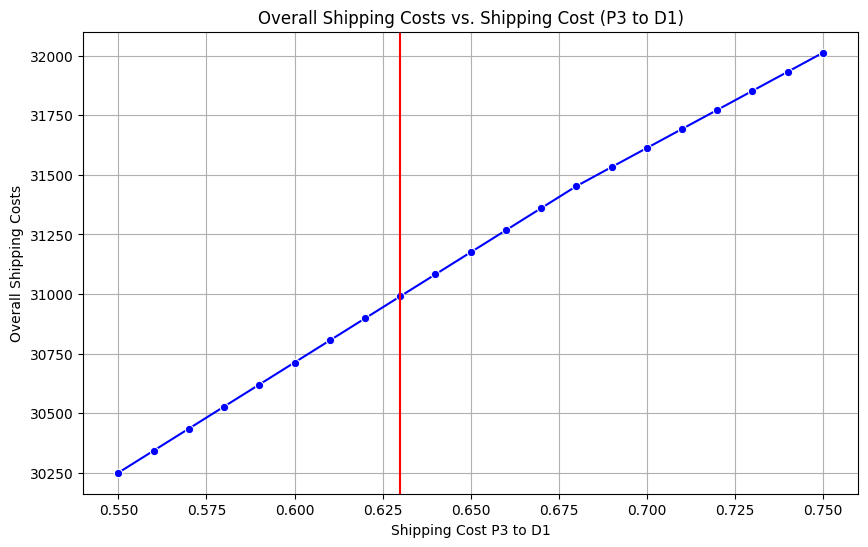

In [ ]:
# New dataframe
obj_df_P3D1 = pd.DataFrame({
    'Shipping Cost P3 to D1': shipping_costs,
    'Overall Shipping Costs': obj_list_P3D1
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=obj_df_P3D1, x='Shipping Cost P3 to D1', y='Overall Shipping Costs', marker='o', color='blue')
plt.axvline(x = .63, color = 'red')
plt.title('Overall Shipping Costs vs. Shipping Cost (P3 to D1)')
plt.xlabel('Shipping Cost P3 to D1')
plt.ylabel('Overall Shipping Costs')
plt.grid(True)
plt.show()

#### Problem 6b

In [ ]:
DV_list_ta=[]
for val in shipping_costs:
    DV_curr_list_ta = []
    cost.loc['P3','D1'] = val
    model = run_model()
    for DV in model.component_objects(pe.Var):
        for c in DV:
            DV_curr_list_ta.append(DV[c].value)
    DV_list_ta.append(DV_curr_list_ta)
print(DV_list_ta)


[[10000.0, 0.0, 0.0, 9750.0, 10500.0, 0.0, 5000.0, 7500.0, 2500.0, 5500.0, 0.0, 0.0, 0.0, 3500.0, 0.0, 6250.0], [10000.0, 0.0, 0.0, 11000.0, 9250.0, 0.0, 5000.0, 7500.0, 1250.0, 5500.0, 0.0, 0.0, 0.0, 4750.0, 0.0, 6250.0], [10000.0, 0.0, 0.0, 11000.0, 9250.0, 0.0, 5000.0, 7500.0, 1250.0, 5500.0, 0.0, 0.0, 0.0, 4750.0, 0.0, 6250.0], [10000.0, 0.0, 0.0, 11000.0, 9250.0, 0.0, 5000.0, 7500.0, 1250.0, 5500.0, 0.0, 0.0, 0.0, 4750.0, 0.0, 6250.0], [10000.0, 0.0, 0.0, 11000.0, 9250.0, 0.0, 5000.0, 7500.0, 1250.0, 5500.0, 0.0, 0.0, 0.0, 4750.0, 0.0, 6250.0], [10000.0, 0.0, 0.0, 11000.0, 9250.0, 0.0, 5000.0, 7500.0, 1250.0, 5500.0, 0.0, 0.0, 0.0, 4750.0, 0.0, 6250.0], [10000.0, 0.0, 0.0, 11000.0, 9250.0, 0.0, 5000.0, 7500.0, 1250.0, 5500.0, 0.0, 0.0, 0.0, 4750.0, 0.0, 6250.0], [10000.0, 0.0, 0.0, 11000.0, 9250.0, 0.0, 5000.0, 7500.0, 1250.0, 5500.0, 0.0, 0.0, 0.0, 4750.0, 0.0, 6250.0], [10000.0, 0.0, 0.0, 11000.0, 9250.0, 0.0, 5000.0, 7500.0, 1250.0, 5500.0, 0.0, 0.0, 0.0, 4750.0, 0.0, 6250.0], 

In [ ]:
DV_col_names=['P1-D1', 'P1-D2', 'P2-D1', 'P2-D2', 'P3-D1', 'P3-D2',
              'D1-W1', 'D1-W2', 'D1-W3', 'D1-W4', 'D1-W5',
              'D2-W1', 'D2-W2', 'D2-W3', 'D2-W4', 'D2-W5']

DV_df_ta = pd.DataFrame(DV_list_ta,
                        columns = DV_col_names)
DV_df_ta['Costs'] = shipping_costs
DV_df_ta

# first graph 84:126
# second graph 126:

,P1-D1,P1-D2,P2-D1,P2-D2,P3-D1,P3-D2,D1-W1,D1-W2,D1-W3,D1-W4,D1-W5,D2-W1,D2-W2,D2-W3,D2-W4,D2-W5,Costs
0,10000.0,0.0,0.0,9750.0,10500.0,0.0,5000.0,7500.0,2500.0,5500.0,0.0,0.0,0.0,3500.0,0.0,6250.0,0.55
1,10000.0,0.0,0.0,11000.0,9250.0,0.0,5000.0,7500.0,1250.0,5500.0,0.0,0.0,0.0,4750.0,0.0,6250.0,0.56
2,10000.0,0.0,0.0,11000.0,9250.0,0.0,5000.0,7500.0,1250.0,5500.0,0.0,0.0,0.0,4750.0,0.0,6250.0,0.57
3,10000.0,0.0,0.0,11000.0,9250.0,0.0,5000.0,7500.0,1250.0,5500.0,0.0,0.0,0.0,4750.0,0.0,6250.0,0.58
4,10000.0,0.0,0.0,11000.0,9250.0,0.0,5000.0,7500.0,1250.0,5500.0,0.0,0.0,0.0,4750.0,0.0,6250.0,0.59
5,10000.0,0.0,0.0,11000.0,9250.0,0.0,5000.0,7500.0,1250.0,5500.0,0.0,0.0,0.0,4750.0,0.0,6250.0,0.60
6,10000.0,0.0,0.0,11000.0,9250.0,0.0,5000.0,7500.0,1250.0,5500.0,0.0,0.0,0.0,4750.0,0.0,6250.0,0.61
7,10000.0,0.0,0.0,11000.0,9250.0,0.0,5000.0,7500.0,1250.0,5500.0,0.0,0.0,0.0,4750.0,0.0,6250.0,0.62
8,10000.0,0.0,0.0,11000.0,9250.0,0.0,5000.0,7500.0,1250.0,5500.0,0.0,0.0,0.0,4750.0,0.0,6250.0,0.63
9,10000.0,0.0,0.0,11000.0,9250.0,0.0,5000.0,7500.0,1250.0,5500.0,0.0,0.0,0.0,4750.0,0.0,6250.0,0.64


In [ ]:
df = pd.melt(DV_df_ta, 'Costs')
df

,Costs,variable,value
0,0.55,P1-D1,10000.0
1,0.56,P1-D1,10000.0
2,0.57,P1-D1,10000.0
3,0.58,P1-D1,10000.0
4,0.59,P1-D1,10000.0
...,...,...,...
331,0.71,D2-W5,6250.0
332,0.72,D2-W5,6250.0
333,0.73,D2-W5,6250.0
334,0.74,D2-W5,6250.0


<ipython-input-24-83be30c55328>:2: UserWarning: 
The palette list has fewer values (12) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x = 'Costs', y = 'value', hue = 'variable', palette = sns.color_palette("Paired"),


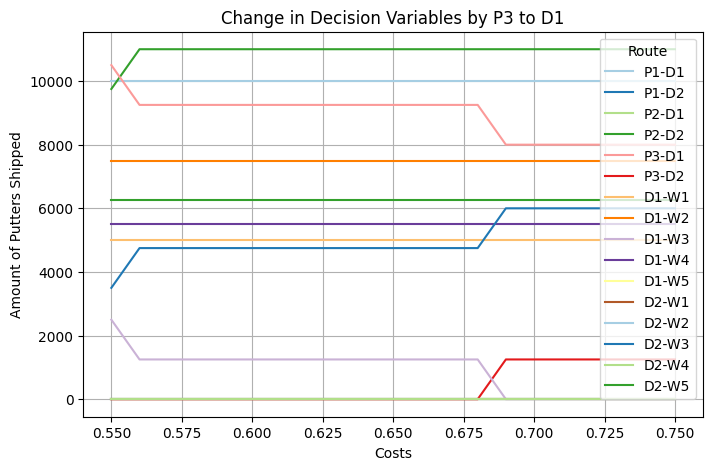

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x = 'Costs', y = 'value', hue = 'variable', palette = sns.color_palette("Paired"),
             data = df)
plt.grid()
plt.title('Change in Decision Variables by P3 to D1')
plt.ylabel('Amount of Putters Shipped')
plt.legend(title = "Route")
plt.show()

#### Problem 7

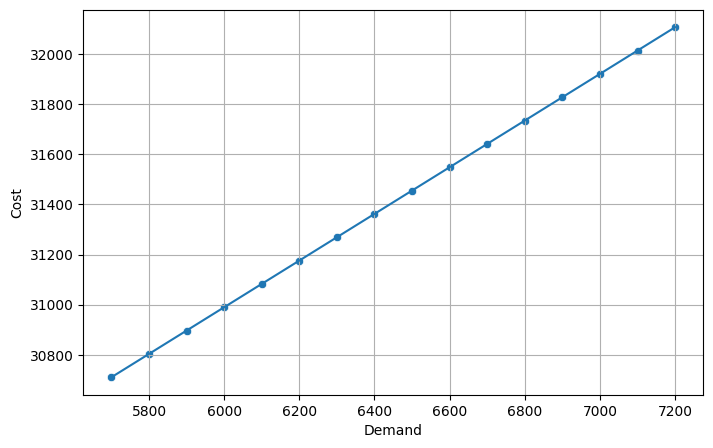

In [ ]:
import numpy as np

demand_W3 = np.arange(5700, 7300, 100)

obj_list_demand_W3 = []
for val in demand_W3:
  requirement.loc['W3', 'requirement'] = val
  model = run_model()
  obj_list_demand_W3.append(model.obj.expr())
obj_df_tb = pd.DataFrame(obj_list_demand_W3, index = demand_W3, columns = ['cost'])
zip_list = list(zip(demand_W3, obj_list_demand_W3))
df7 = pd.DataFrame(zip_list, columns = ['Demand', 'Cost'])
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'Demand', y = 'Cost', data = df7)
sns.lineplot(x = 'Demand', y = 'Cost', data = df7)
plt.grid()
plt.show()